In [43]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import sequence
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

ImportError: cannot import name 'sequence' from 'keras.preprocessing.sequence' (C:\Users\THANMAYA\anaconda3\lib\site-packages\keras\preprocessing\sequence.py)

In [4]:
data=pd.read_csv('Sentiment.csv')
data

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [5]:
data.isnull().values.any()

data.shape

(13871, 21)

In [6]:
data.info

<bound method DataFrame.info of           id               candidate  candidate_confidence relevant_yn  \
0          1  No candidate mentioned                1.0000         yes   
1          2            Scott Walker                1.0000         yes   
2          3  No candidate mentioned                1.0000         yes   
3          4  No candidate mentioned                1.0000         yes   
4          5            Donald Trump                1.0000         yes   
...      ...                     ...                   ...         ...   
13866  13867  No candidate mentioned                1.0000         yes   
13867  13868           Mike Huckabee                0.9611         yes   
13868  13869                Ted Cruz                1.0000         yes   
13869  13870            Donald Trump                1.0000         yes   
13870  13871                Ted Cruz                0.9242         yes   

       relevant_yn_confidence sentiment  sentiment_confidence  \
0             

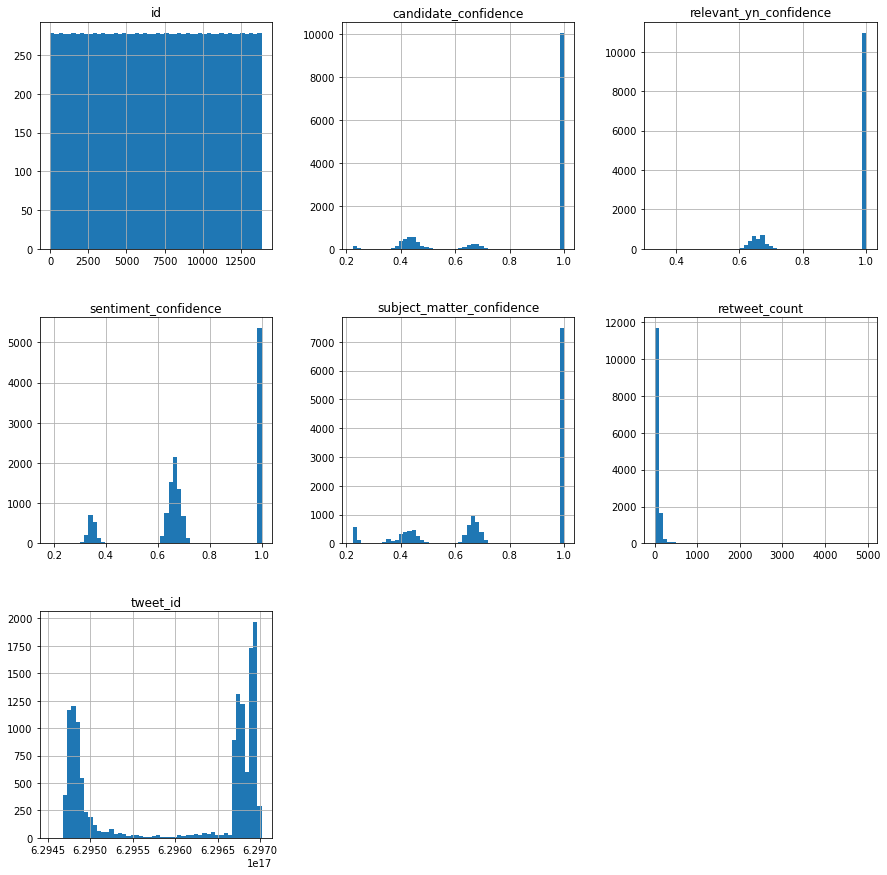

In [10]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

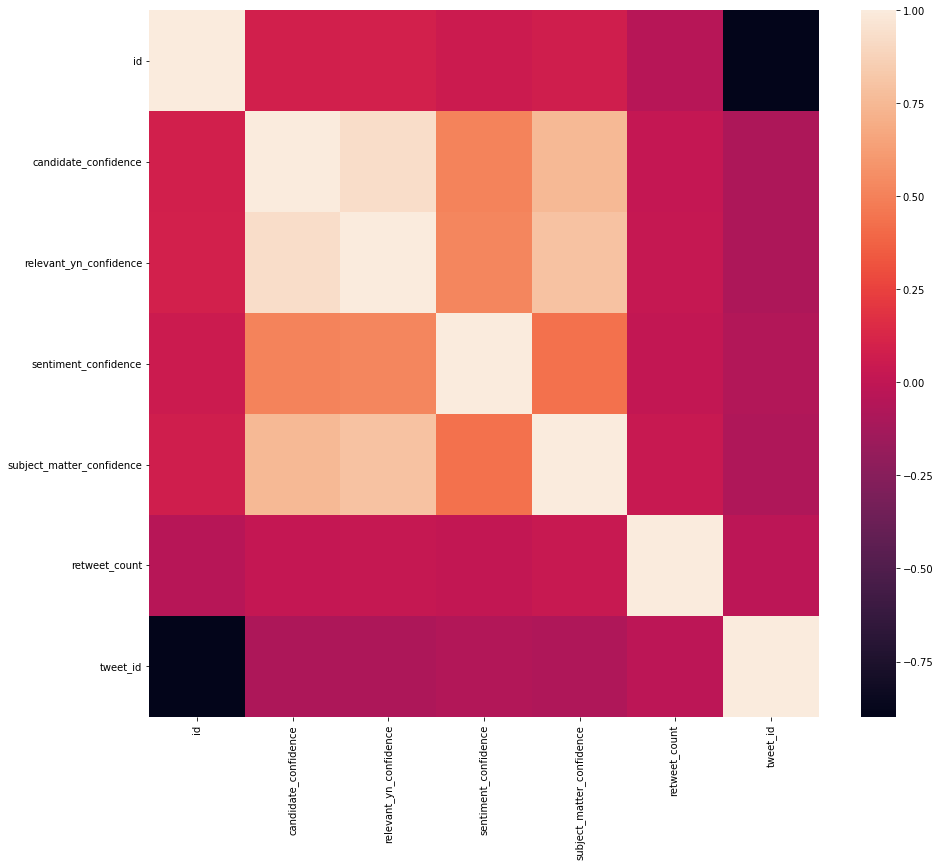

In [14]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [15]:
data.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [16]:
data.isna().sum()

id                               0
candidate                       96
candidate_confidence             0
relevant_yn                      0
relevant_yn_confidence           0
sentiment                        0
sentiment_confidence             0
subject_matter                 326
subject_matter_confidence        0
candidate_gold               13843
name                             0
relevant_yn_gold             13839
retweet_count                    0
sentiment_gold               13856
subject_matter_gold          13853
text                             0
tweet_coord                  13850
tweet_created                    0
tweet_id                         0
tweet_location                3912
user_timezone                 4403
dtype: int64

In [17]:
data["text"][3]


"RT @RobGeorge: That Carly Fiorina is trending -- hours after HER debate -- above any of the men in just-completed #GOPdebate says she's on …"

In [19]:
sns.countplot(x='sentiment', data1=data)

ValueError: Could not interpret input 'sentiment'

In [28]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [29]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [30]:
X = []
sentences = list(data['text'])
for sen in sentences:
    X.append(preprocess_text(sen))
    

In [31]:
print(X)

['RT NancyLeeGrahn How did everyone feel about the Climate Change question last night Exactly GOPDebate', 'RT ScottWalker Didn catch the full GOPdebate last night Here are some of Scott best lines in seconds Walker http co ZSfF ', 'RT TJMShow No mention of Tamir Rice and the GOPDebate was held in Cleveland Wow ', 'RT RobGeorge That Carly Fiorina is trending hours after HER debate above any of the men in just completed GOPdebate says she on ', 'RT DanScavino GOPDebate realDonaldTrump delivered the highest ratings in the history of presidential debates Trump http co ', 'RT GregAbbott TX TedCruz On my first day will rescind every illegal executive action taken by Barack Obama GOPDebate FoxNews', 'RT warriorwoman liked her and was happy when heard she was going to be the moderator Not anymore GOPDebate megynkelly https ', 'Going on MSNBC Live with ThomasARoberts around PM ET GOPDebate', 'Deer in the headlights RT lizzwinstead Ben Carson may be the only brain surgeon who has performed lobot

In [32]:
y = data['sentiment']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
print(X_train)
print(y_train)

['RT RWSurferGirl We the American people pick the next President of United States not FOX News GOPDebate GOPDebates', 'RT KevXIndy seriously wish JamesRosenFNC was one of tonight moderators FOXNEWSDEBATE GOPDebate', ' Trump getting shit for raising his hand last night Make America great again is the slogan Not Republicans GOPDebate ', 'RT PoliticalAnt MarcoRubio lied when he said he had never advocated for exceptions to abortion bans GOPdebate', 'RT jsc Jebby talking changing tax code to fix job killers Is that Jebspeak for give corporations more tax breaks GOPDebates', 'Fairly confident after bencarson last answer he playing the gopdebates drinking game along with the rest of us ', 'RT shannonrwatts states have done what congress won closed background check loophole We need the next President to ACT GOPDebate ', 'Dr are you seriously saying that Hillary Clinton is trying to destroy America That ridiculous amp and shame on your lies GOPDebates', 'RT SupermanHotMale Dear Gov Walker you 

In [36]:
print(X_test)
print(y_test)

['To me the real winner of last night GOPDebate was megynkelly MegynKelly', 'RT DanScavino megynkelly Some results on how candidates did at GOPDebate MakeAmericaGreatAgain Trump KellyFailed http co ', 'I going to bed JohnKasich gets my vote tonight GOPDebate GOPDebates', ' FoxNews after last night GOPDebate RealBenCarson GovMikeHuckabee have emerged as my top two', 'RT TCPalmKGardner Who told the truth and whose pants are on fire from last night GOPDebate http co WhLKEkq FM ', 'I won defend FoxNews they were FAR from fair OR balanced last night but name calling is juvenile GOPDebate', 'RT CCalbos Huckabee the military is to kill people and break things On behalf of military families you GOPDebate', 'RT ryanbeckwith TRANSCRIPT Here is the full and final text of the GOPDebate http co Wp V utf http co WFyL lwpoL', 'loved watching the GOPdebates tonight Lot of good stuff amp some not so good stuff Really enjoyed watching it with my daughter amp discussing', 'RT KaivanShroff Wow Beyond delu

In [37]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [44]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100


In [46]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('Sentiment.csv', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

ValueError: could not convert string to float: 'candidate'

In [47]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

NameError: name 'Embedding' is not defined